In [3]:
import pandas as pd
import glob

# Se coge solo los municipios de Medellin

### Pluviografica
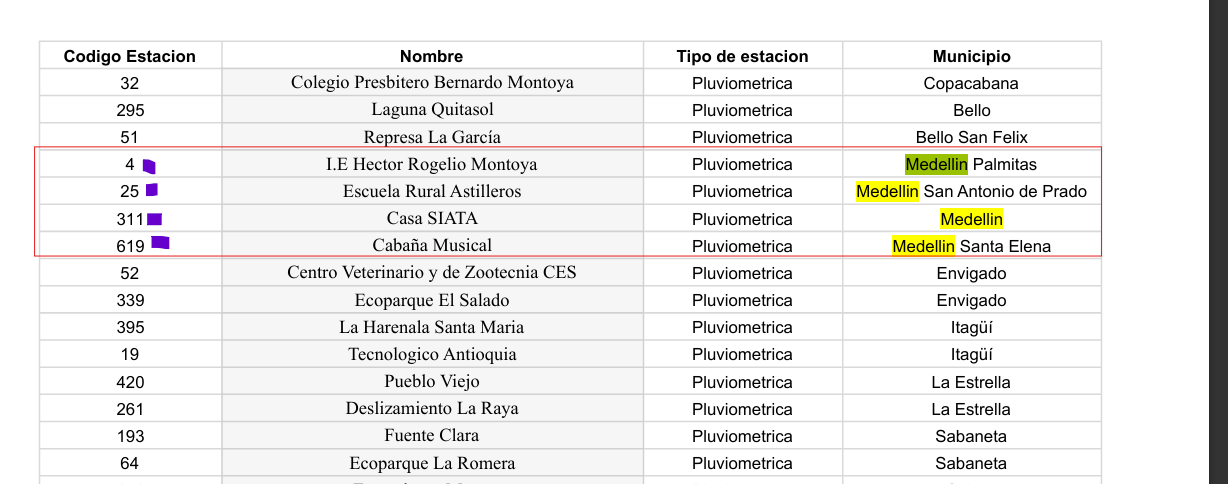

### Meteorologica

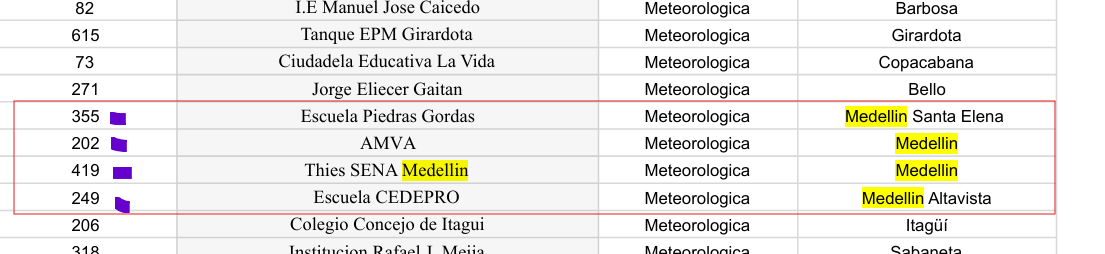

In [ ]:
  # M     P
# 355 -> 619
# 207 -> 619
# 202 -> 311 
# 419 -> 311
# 249 -> 4
# 197 -> 25

## Meteorologica

In [4]:
file_paths = glob.glob("zoneRaw/Datos_SIATA/Estacion_meteorologica*.csv")
df = pd.concat((pd.read_csv(file) for file in file_paths), ignore_index=True)

 En los archivos, el registro-999 corresponde con un dato faltante, y en la ultima columna
 se consigna el INDICE DE CALIDAD del registro. Se realiza una segmentacion de solo el codigo donde se pertence una ciudad.
 355,202,419,249

In [5]:
codigosMedellin = [355,202,419,249,207,197] # 207 a  # 197 a

In [6]:
df = df[df['codigo'].isin(codigosMedellin)]

In [7]:
df.shape

(23460717, 11)

In [8]:
df.columns

Index(['codigo', 'fecha_hora', 'h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max',
       'p', 'calidad'],
      dtype='object')

In [9]:
columnas_a_verificar = ['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max','p']
df_filtrado = df[~(df[columnas_a_verificar] == -999).any(axis=1)]
df_filtrado

,codigo,fecha_hora,h,t,pr,vv,vv_max,dv,dv_max,p,calidad
5529996,197,2018-02-07 13:44:00,32.67,29.30,840.31,1.08,2.4,337.0,213.0,0.0,1
5529997,197,2018-02-07 13:45:00,32.95,29.30,840.30,1.94,2.9,281.0,267.0,0.0,1
5529998,197,2018-02-07 13:48:00,32.00,29.50,840.26,0.95,2.4,267.0,256.0,0.0,1
5529999,197,2018-02-07 13:49:00,32.37,29.52,840.20,0.63,1.0,177.0,143.0,0.0,1
5530000,197,2018-02-07 13:52:00,30.57,29.96,840.10,1.47,2.2,324.0,213.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
48383905,419,2024-07-31 23:55:00,71.02,21.27,851.57,6.62,9.7,13.0,17.0,0.0,1
48383906,419,2024-07-31 23:56:00,71.98,21.20,851.60,5.07,6.8,8.0,14.0,0.0,1
48383907,419,2024-07-31 23:57:00,72.00,21.20,851.59,6.53,8.8,5.0,5.0,0.0,1
48383908,419,2024-07-31 23:58:00,72.00,21.14,851.60,7.17,8.6,13.0,9.0,0.0,1


In [10]:
df_filtrado[(df_filtrado == -999).any(axis=1)]

,codigo,fecha_hora,h,t,pr,vv,vv_max,dv,dv_max,p,calidad


In [11]:
df = df_filtrado.copy()

In [12]:
del df_filtrado

 En todos los campos anteriores, el registro-999 corresponde con un dato faltante y en la
 ultima columna de cada archivo se consigna el INDICE DE CALIDAD del registro. Los
 ndices de calidad de la red meteorologica se presentan en el cuadro a continuacion:
 
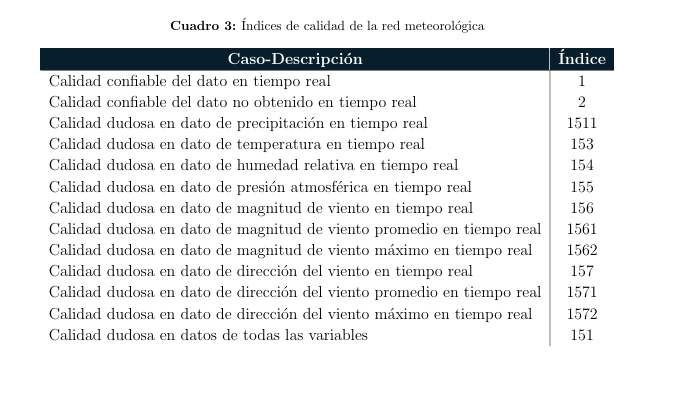

In [11]:
import matplotlib.pyplot as plt

df['calidad'].value_counts()



calidad
1          13641697
2            375630
154          218051
153           57571
156272        35259
155           25934
1511          17565
254           13901
1567          11160
151            5381
156            2340
255            2196
1514           1700
15345          1446
2511           1075
256272          557
1562            515
1534            476
2567            355
256             158
1546            143
2514            131
1546272          70
1545             67
1516272          57
1561             54
25345            36
1556272          32
1536             31
15462            27
15167            11
15672             8
2562              8
1516              5
15367             5
2546272           4
1515              4
15627             4
15146             4
1535              3
251               3
15467             2
2534              2
1571              2
15156             2
2556272           2
15162             1
15361             1
1572              1
1652        

In [12]:
df.iloc[:10].copy()

,codigo,fecha_hora,h,t,pr,vv,vv_max,dv,dv_max,p,calidad
5369602,202,2012-10-30 13:00:37,59.2,22.5,849.5,4.1,4.2,212.0,212.0,0.0,1
5369603,202,2012-10-30 13:01:37,59.5,22.5,849.5,4.1,4.1,167.0,167.0,0.0,1
5369604,202,2012-10-30 13:02:37,57.8,22.6,849.5,4.7,4.8,285.0,285.0,0.0,1
5369605,202,2012-10-30 13:03:37,57.7,22.6,849.4,5.9,6.0,265.0,265.0,0.0,1
5369606,202,2012-10-30 13:04:37,58.4,22.6,849.4,5.9,6.0,181.0,181.0,0.0,1
5369607,202,2012-10-30 13:05:37,59.0,22.5,849.3,6.4,6.4,220.0,220.0,0.0,1
5369608,202,2012-10-30 13:06:37,59.3,22.5,849.4,5.5,5.6,214.0,214.0,0.0,1
5369609,202,2012-10-30 13:07:37,60.3,22.4,849.4,4.5,4.6,117.0,117.0,0.0,1
5369610,202,2012-10-30 13:08:37,60.7,22.4,849.4,4.7,4.8,244.0,244.0,0.0,1
5369611,202,2012-10-30 13:09:37,61.0,22.4,849.4,4.9,4.9,132.0,132.0,0.0,1


In [13]:
import numpy as np
df["procedencia"] = np.where(df['calidad']==1,'Tiempo Real','Desconocido')
df["procedencia"] = np.where(df['calidad']==2,'Importado',df["procedencia"])
df["calidad_dudosa"] = df['calidad'].apply(lambda x: ['Buena'] if x == 1 or x ==2 else None)
df

,codigo,fecha_hora,h,t,pr,vv,vv_max,dv,dv_max,p,calidad,procedencia,calidad_dudosa
5529996,197,2018-02-07 13:44:00,32.67,29.30,840.31,1.08,2.4,337.0,213.0,0.0,1,Tiempo Real,[Buena]
5529997,197,2018-02-07 13:45:00,32.95,29.30,840.30,1.94,2.9,281.0,267.0,0.0,1,Tiempo Real,[Buena]
5529998,197,2018-02-07 13:48:00,32.00,29.50,840.26,0.95,2.4,267.0,256.0,0.0,1,Tiempo Real,[Buena]
5529999,197,2018-02-07 13:49:00,32.37,29.52,840.20,0.63,1.0,177.0,143.0,0.0,1,Tiempo Real,[Buena]
5530000,197,2018-02-07 13:52:00,30.57,29.96,840.10,1.47,2.2,324.0,213.0,0.0,1,Tiempo Real,[Buena]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48383905,419,2024-07-31 23:55:00,71.02,21.27,851.57,6.62,9.7,13.0,17.0,0.0,1,Tiempo Real,[Buena]
48383906,419,2024-07-31 23:56:00,71.98,21.20,851.60,5.07,6.8,8.0,14.0,0.0,1,Tiempo Real,[Buena]
48383907,419,2024-07-31 23:57:00,72.00,21.20,851.59,6.53,8.8,5.0,5.0,0.0,1,Tiempo Real,[Buena]
48383908,419,2024-07-31 23:58:00,72.00,21.14,851.60,7.17,8.6,13.0,9.0,0.0,1,Tiempo Real,[Buena]


In [14]:
df_diferente_1 = df[(df['calidad'] != 1) & (df['calidad'] != 2)].copy()
df_igual_1 = df[(df['calidad'] == 1) | (df['calidad'] == 2) ].copy()
df_diferente_1.shape[0] + df_igual_1.shape[0]

23162293

In [15]:
import multiprocessing
multiprocessing.cpu_count()

12

In [16]:
def categorizar_calidad(codigo):
    codigo = str(codigo)
    if codigo.startswith('1'):
        procedencia = 'Tiempo Real'
    elif codigo.startswith('2'):
        procedencia = 'Importado'
    else:
        procedencia = 'Desconocido'
    
    calidad_dudosa = []
    if '5' in codigo:
        if '3' in codigo:
            calidad_dudosa.append('Temperatura')
        if '4' in codigo:
            calidad_dudosa.append('Humedad')
        if '1' in codigo:
            calidad_dudosa.append('Precipitación')
        if '5' in codigo:
            calidad_dudosa.append('Presión Atmosférica')
        if '6' in codigo:
            calidad_dudosa.append('Viento Magnitud')
        if '7' in codigo:
            calidad_dudosa.append('Viento Dirección')
    
    return procedencia, calidad_dudosa if calidad_dudosa else ['Buena']


In [17]:
import pandas as pd
import numpy as np
import time
from concurrent.futures import ThreadPoolExecutor

num_threads = 8

df_split = np.array_split(df_diferente_1, num_threads)

def process_chunk(chunk):
    chunk[['procedencia', 'calidad_dudosa']] = chunk['calidad'].apply(lambda x: pd.Series(categorizar_calidad(x)))
    return chunk

start_time = time.time()

with ThreadPoolExecutor(max_workers=num_threads) as executor:
    results = list(executor.map(process_chunk, df_split))

df_final = pd.concat(results, ignore_index=True)

end_time = time.time()
execution_time = end_time - start_time

print(f"Tiempo de ejecución total en paralelo para un millon: {execution_time} segundos")
df_final


C:\Users\emanu\anaconda3\envs\proyectoIntegrador\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Tiempo de ejecución total en paralelo para un millon: 84.29320740699768 segundos


,codigo,fecha_hora,h,t,pr,vv,vv_max,dv,dv_max,p,calidad,procedencia,calidad_dudosa
0,197,2018-02-07 16:09:00,48.00,27.20,839.22,1.47,0.0,2.0,0.0,0.00,156272,Tiempo Real,"[Precipitación, Presión Atmosférica, Viento Ma..."
1,197,2018-02-08 02:11:00,77.00,20.60,842.40,0.44,0.0,321.0,0.0,0.00,156272,Tiempo Real,"[Precipitación, Presión Atmosférica, Viento Ma..."
2,197,2018-02-08 10:49:00,53.03,24.80,843.87,1.01,0.0,19.0,0.0,0.00,156272,Tiempo Real,"[Precipitación, Presión Atmosférica, Viento Ma..."
3,197,2018-02-08 17:41:00,57.00,25.13,840.29,0.60,0.0,35.0,0.0,0.00,156272,Tiempo Real,"[Precipitación, Presión Atmosférica, Viento Ma..."
4,197,2018-02-09 00:06:00,82.00,19.89,842.90,0.51,0.0,20.0,0.0,0.00,156272,Tiempo Real,"[Precipitación, Presión Atmosférica, Viento Ma..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
652772,419,2024-07-29 08:07:00,70.00,23.11,851.90,1.28,1.7,83.0,80.0,0.01,1511,Tiempo Real,"[Precipitación, Presión Atmosférica]"
652773,419,2024-07-29 10:56:00,49.48,28.41,848.80,2.72,3.9,0.0,351.0,0.01,1511,Tiempo Real,"[Precipitación, Presión Atmosférica]"
652774,419,2024-07-29 13:20:00,42.00,30.51,847.11,2.48,5.2,56.0,74.0,0.01,1511,Tiempo Real,"[Precipitación, Presión Atmosférica]"
652775,419,2024-07-31 09:05:00,57.68,24.46,849.95,3.78,7.0,46.0,79.0,0.01,1511,Tiempo Real,"[Precipitación, Presión Atmosférica]"


In [18]:
df_igual_1.shape[0] + df_final.shape[0]

23162293

In [19]:
df = pd.concat([df_igual_1, df_final], ignore_index=True)
df

,codigo,fecha_hora,h,t,pr,vv,vv_max,dv,dv_max,p,calidad,procedencia,calidad_dudosa
0,197,2018-02-07 13:44:00,32.67,29.30,840.31,1.08,2.4,337.0,213.0,0.00,1,Tiempo Real,[Buena]
1,197,2018-02-07 13:45:00,32.95,29.30,840.30,1.94,2.9,281.0,267.0,0.00,1,Tiempo Real,[Buena]
2,197,2018-02-07 13:48:00,32.00,29.50,840.26,0.95,2.4,267.0,256.0,0.00,1,Tiempo Real,[Buena]
3,197,2018-02-07 13:49:00,32.37,29.52,840.20,0.63,1.0,177.0,143.0,0.00,1,Tiempo Real,[Buena]
4,197,2018-02-07 13:52:00,30.57,29.96,840.10,1.47,2.2,324.0,213.0,0.00,1,Tiempo Real,[Buena]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23162288,419,2024-07-29 08:07:00,70.00,23.11,851.90,1.28,1.7,83.0,80.0,0.01,1511,Tiempo Real,"[Precipitación, Presión Atmosférica]"
23162289,419,2024-07-29 10:56:00,49.48,28.41,848.80,2.72,3.9,0.0,351.0,0.01,1511,Tiempo Real,"[Precipitación, Presión Atmosférica]"
23162290,419,2024-07-29 13:20:00,42.00,30.51,847.11,2.48,5.2,56.0,74.0,0.01,1511,Tiempo Real,"[Precipitación, Presión Atmosférica]"
23162291,419,2024-07-31 09:05:00,57.68,24.46,849.95,3.78,7.0,46.0,79.0,0.01,1511,Tiempo Real,"[Precipitación, Presión Atmosférica]"


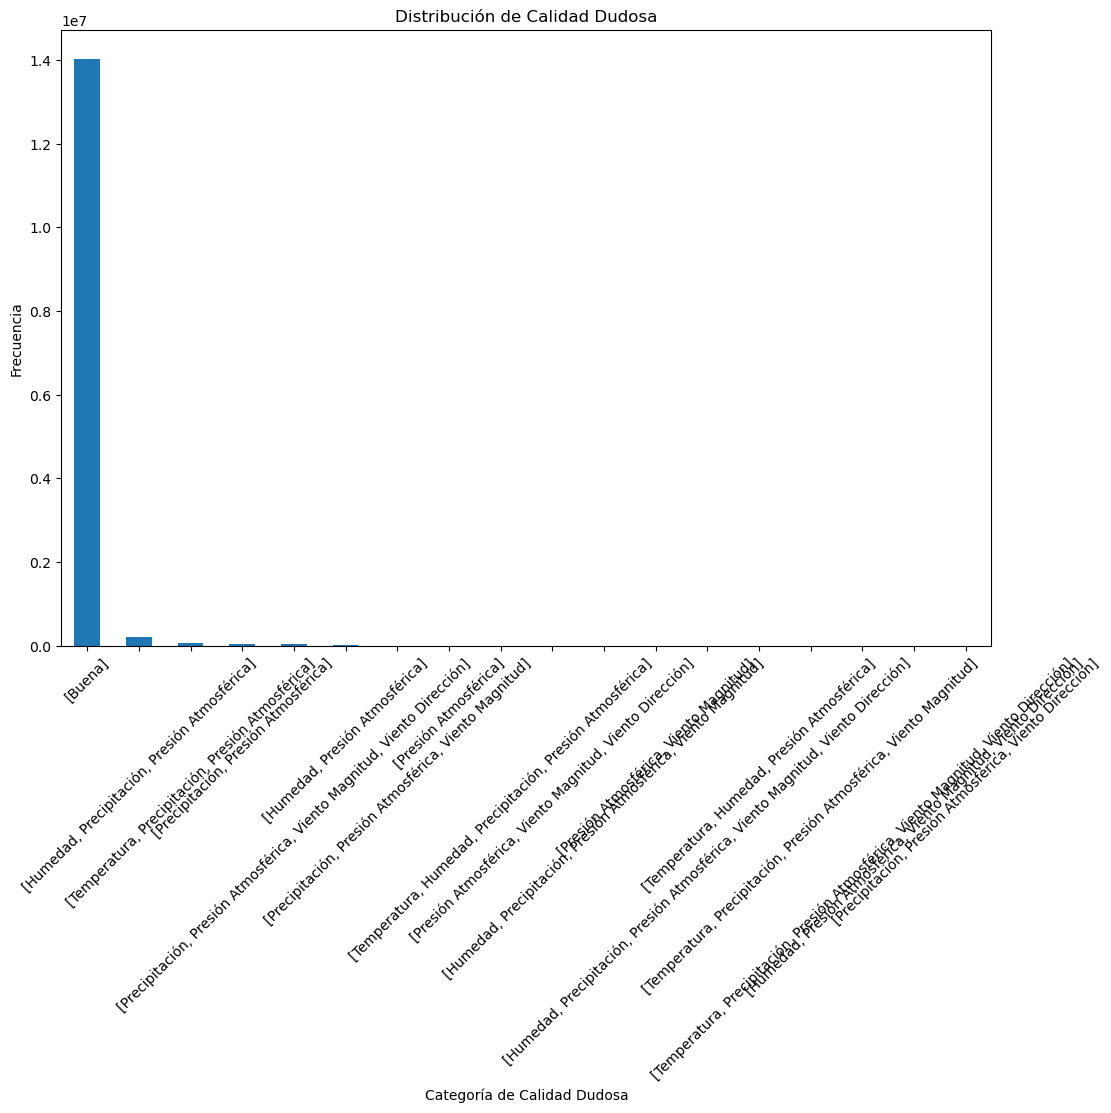

In [128]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
df['calidad_dudosa'].value_counts().plot(kind='bar')
plt.title("Distribución de Calidad Dudosa")
plt.xlabel("Categoría de Calidad Dudosa")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

In [11]:
#df_filas_con_problemas_calidad = df[(df['calidad'] == 1) | (df['calidad'] == 2) ].copy()
#df_filas_con_problemas_calidad.shape

(14017327, 11)

In [129]:
df['calidad_dudosa'].value_counts()

calidad_dudosa
[Buena]                                                                                 14017327
[Humedad, Precipitación, Presión Atmosférica]                                             219949
[Temperatura, Precipitación, Presión Atmosférica]                                          57574
[Precipitación, Presión Atmosférica]                                                       49962
[Precipitación, Presión Atmosférica, Viento Magnitud, Viento Dirección]                    46531
[Humedad, Presión Atmosférica]                                                             13901
[Precipitación, Presión Atmosférica, Viento Magnitud]                                       2918
[Presión Atmosférica]                                                                       2196
[Temperatura, Humedad, Precipitación, Presión Atmosférica]                                  1922
[Presión Atmosférica, Viento Magnitud, Viento Dirección]                                     914
[Humedad, Preci

In [20]:
df_filas_con_problemas_calidad = df[df['calidad_dudosa'].apply(len) == 1].copy()

In [21]:
import matplotlib.pyplot as plt

df_filas_con_problemas_calidad['calidad'].value_counts()



calidad
1      21797278
2        712238
255        2214
Name: count, dtype: int64

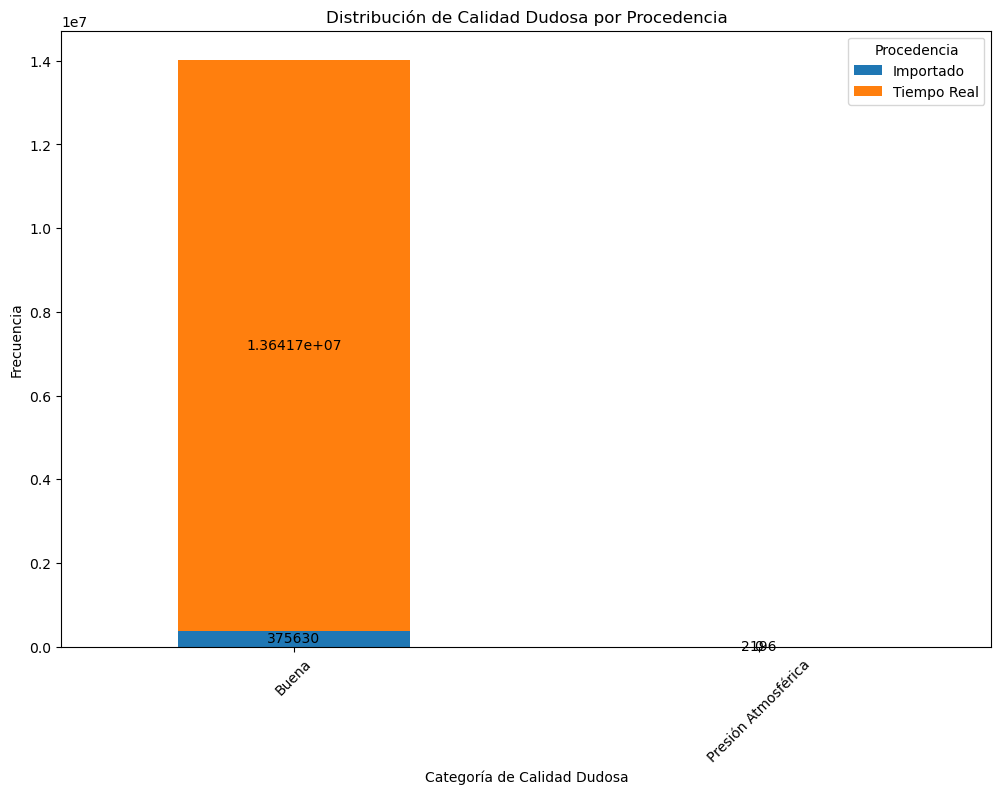

In [130]:

import matplotlib.pyplot as plt

df_filas_con_problemas_calidad['calidad_dudosa_str'] = df_filas_con_problemas_calidad['calidad_dudosa'].apply(lambda x: ', '.join(x))

frecuencia_calidad = df_filas_con_problemas_calidad.groupby(['calidad_dudosa_str', 'procedencia']).size().unstack(fill_value=0)

ax = frecuencia_calidad.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title("Distribución de Calidad Dudosa por Procedencia")
plt.xlabel("Categoría de Calidad Dudosa")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.legend(title="Procedencia")
plt.show()

In [ ]:
# Cuando se daña la presion Atmosferica se pueden dañar los otros dispoitivos o calculos?

In [22]:
df_filas_con_problemas_calidad.columns


Index(['codigo', 'fecha_hora', 'h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max',
       'p', 'calidad', 'procedencia', 'calidad_dudosa'],
      dtype='object')

In [16]:
#df = df[['codigo', 'fecha_hora', 'h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max',
#       'p', 'calidad',]].copy()
#df.shape

(14413688, 11)

In [23]:
df = df_filas_con_problemas_calidad[['codigo', 'fecha_hora', 'h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max',
       'p', 'calidad',]].copy()
df.shape

(22511730, 11)

In [24]:
df = df.drop_duplicates()
df

,codigo,fecha_hora,h,t,pr,vv,vv_max,dv,dv_max,p,calidad
0,197,2018-02-07 13:44:00,32.67,29.30,840.31,1.08,2.4,337.0,213.0,0.0,1
1,197,2018-02-07 13:45:00,32.95,29.30,840.30,1.94,2.9,281.0,267.0,0.0,1
2,197,2018-02-07 13:48:00,32.00,29.50,840.26,0.95,2.4,267.0,256.0,0.0,1
3,197,2018-02-07 13:49:00,32.37,29.52,840.20,0.63,1.0,177.0,143.0,0.0,1
4,197,2018-02-07 13:52:00,30.57,29.96,840.10,1.47,2.2,324.0,213.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
22948596,249,2020-12-15 12:00:00,55.30,23.00,0.00,1.42,1.8,192.0,194.0,0.0,255
22948597,249,2020-12-15 12:01:00,56.25,23.10,0.00,1.00,2.3,186.0,198.0,0.0,255
22952014,249,2022-08-30 16:10:00,42.15,26.80,0.00,0.47,1.4,137.0,125.0,0.0,255
22952018,249,2022-08-30 16:14:00,45.13,26.52,0.00,1.14,2.5,65.0,38.0,0.0,255


In [25]:
columnas_fecha = ['fecha_hora']  

for columna in columnas_fecha:
    try:
        df[columna] = pd.to_datetime(df[columna], errors='coerce')
    except Exception as e:
        print(f"Error al convertir la columna {columna}: {e}")

In [101]:
# Mirar fecha
# Alineación Temporal para Comparación y Análisis
# Consistencia en Modelos de Series Temporales
# Detección de Desplazamientos Temporales, cambio de ciudades si es muy fuerte o no y que implican a la otra
# Simplificación del Análisis de Datos

fecha_minima_por_codigo = df.groupby('codigo')['fecha_hora'].min().reset_index()
fecha_minima_por_codigo = fecha_minima_por_codigo.rename(columns={'fecha_hora': 'fecha_minima'})
fecha_minima_por_codigo

,codigo,fecha_minima
0,197,2019-12-26 16:00:00
1,202,2019-12-26 16:00:00
2,207,2019-12-26 16:00:00
3,249,2019-12-26 16:00:00
4,355,2019-12-26 16:00:00
5,419,2019-12-26 16:00:00


In [100]:
fecha_maxima_por_codigo = df.groupby('codigo')['fecha_hora'].max().reset_index()
fecha_maxima_por_codigo = fecha_maxima_por_codigo.rename(columns={'fecha_hora': 'fecha_minima'})
fecha_maxima_por_codigo

,codigo,fecha_minima
0,197,2024-07-19 10:34:00
1,202,2024-07-19 10:34:00
2,207,2024-07-19 10:34:00
3,249,2024-07-19 10:34:00
4,355,2024-07-19 10:34:00
5,419,2024-07-19 10:34:00


In [27]:
fecha_minima_global = fecha_minima_por_codigo['fecha_minima'].max()
fecha_maxima_global = fecha_maxima_por_codigo['fecha_minima'].min()
print("Fecha Minimas entre las fechas maximas:", fecha_maxima_global)
print("Fecha máxima entre las fechas mínimas:", fecha_minima_global)

Fecha Minimas entre las fechas maximas: 2024-07-19 10:35:00
Fecha máxima entre las fechas mínimas: 2019-12-26 15:59:00


In [97]:
fecha_minima_global = fecha_minima_por_codigo['fecha_minima'].max()
fecha_maxima_global = fecha_maxima_por_codigo['fecha_minima'].min()
print("Fecha Minimas entre las fechas maximas:", fecha_maxima_global)
print("Fecha máxima entre las fechas mínimas:", fecha_minima_global)

Fecha Minimas entre las fechas maximas: 2024-07-19 10:35:00
Fecha máxima entre las fechas mínimas: 2019-12-26 15:59:00


In [98]:
df = df[df['fecha_hora'] > fecha_minima_global]
df

,codigo,fecha_hora,h,t,pr,vv,vv_max,dv,dv_max,p,calidad
820912,197,2019-12-26 16:00:00,62.23,28.87,838.10,0.99,1.7,229.0,244.0,0.0,1
820913,197,2019-12-26 16:01:00,61.77,28.78,838.11,2.25,3.8,189.0,198.0,0.0,1
820914,197,2019-12-26 16:02:00,61.60,28.70,838.15,1.22,3.5,181.0,189.0,0.0,1
820915,197,2019-12-26 16:03:00,61.92,28.70,838.19,1.12,3.2,216.0,239.0,0.0,1
820916,197,2019-12-26 16:04:00,61.38,28.64,838.20,1.85,3.0,217.0,231.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
23240404,249,2020-12-15 12:00:00,55.30,23.00,0.00,1.42,1.8,192.0,194.0,0.0,255
23240405,249,2020-12-15 12:01:00,56.25,23.10,0.00,1.00,2.3,186.0,198.0,0.0,255
23246182,249,2022-08-30 16:10:00,42.15,26.80,0.00,0.47,1.4,137.0,125.0,0.0,255
23246186,249,2022-08-30 16:14:00,45.13,26.52,0.00,1.14,2.5,65.0,38.0,0.0,255


In [99]:
df = df[df['fecha_hora'] < fecha_maxima_global]
df

,codigo,fecha_hora,h,t,pr,vv,vv_max,dv,dv_max,p,calidad
820912,197,2019-12-26 16:00:00,62.23,28.87,838.10,0.99,1.7,229.0,244.0,0.0,1
820913,197,2019-12-26 16:01:00,61.77,28.78,838.11,2.25,3.8,189.0,198.0,0.0,1
820914,197,2019-12-26 16:02:00,61.60,28.70,838.15,1.22,3.5,181.0,189.0,0.0,1
820915,197,2019-12-26 16:03:00,61.92,28.70,838.19,1.12,3.2,216.0,239.0,0.0,1
820916,197,2019-12-26 16:04:00,61.38,28.64,838.20,1.85,3.0,217.0,231.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
23240404,249,2020-12-15 12:00:00,55.30,23.00,0.00,1.42,1.8,192.0,194.0,0.0,255
23240405,249,2020-12-15 12:01:00,56.25,23.10,0.00,1.00,2.3,186.0,198.0,0.0,255
23246182,249,2022-08-30 16:10:00,42.15,26.80,0.00,0.47,1.4,137.0,125.0,0.0,255
23246186,249,2022-08-30 16:14:00,45.13,26.52,0.00,1.14,2.5,65.0,38.0,0.0,255


In [102]:
df = df.sort_values(by=['codigo', 'fecha_hora']).reset_index(drop=True)
df['diferencia_tiempo'] = df.groupby('codigo')['fecha_hora'].diff().dt.total_seconds() / 60 
saltos_minuto = df[(df['diferencia_tiempo'] != 1) & (df['diferencia_tiempo'].notnull())]
print("Registros que no están en intervalos de un minuto:")
saltos_minuto[['codigo', 'fecha_hora', 'diferencia_tiempo']]

Registros que no están en intervalos de un minuto:


,codigo,fecha_hora,diferencia_tiempo
116,197,2019-12-26 17:57:00,2.0
286,197,2019-12-26 20:48:00,2.0
383,197,2019-12-26 22:26:00,2.0
505,197,2019-12-27 07:26:00,419.0
599,197,2019-12-27 09:01:00,2.0
...,...,...,...
13473098,419,2024-07-18 08:30:00,2.0
13473163,419,2024-07-18 09:36:00,2.0
13473195,419,2024-07-18 10:09:00,2.0
13473227,419,2024-07-18 10:42:00,2.0


In [26]:
df.to_csv('stagingZone/Estacion_Meteologica.csv', index=False)

In [106]:
print("hola")

hola


In [103]:
saltos_mayores_por_codigo = saltos_minuto.sort_values(by=['codigo', 'diferencia_tiempo'], ascending=[True, False]) \
                                         .drop_duplicates(subset=['codigo'], keep='first') \
                                         [['codigo', 'fecha_hora', 'diferencia_tiempo']]
saltos_mayores_por_codigo

,codigo,fecha_hora,diferencia_tiempo
2225455,197,2024-06-26 11:03:00,37227.0
2914787,202,2021-04-13 14:18:00,4087.0
6444429,207,2023-12-12 14:14:00,121167.0
8501946,249,2023-07-31 12:04:00,27496.0
10621907,355,2023-06-08 16:13:00,21910.0
12981691,419,2023-07-28 15:30:00,31966.0


In [31]:
ciudad_202 = df[df['codigo'] == 202].set_index('fecha_hora').sort_index()
ciudad_419 = df[df['codigo'] == 419].set_index('fecha_hora').sort_index()

merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']],
    lsuffix='_202', rsuffix='_419', how='inner'
)
merged_data = merged_data.dropna()
merged_data

,h_202,t_202,pr_202,vv_202,vv_max_202,dv_202,dv_max_202,h_419,t_419,pr_419,vv_419,vv_max_419,dv_419,dv_max_419
fecha_hora,,,,,,,,,,,,,,
2019-12-26 16:00:00,34.9,28.8,845.6,4.7,7.1,130.0,124.0,37.00,28.73,843.73,7.08,9.7,102.0,288.0
2019-12-26 16:01:00,35.6,28.7,845.7,3.9,6.1,125.0,122.0,37.00,28.76,843.80,4.94,8.1,93.0,206.0
2019-12-26 16:02:00,34.9,28.7,845.7,5.3,9.5,126.0,124.0,37.00,28.71,843.80,6.70,8.4,90.0,83.0
2019-12-26 16:03:00,34.6,28.7,845.6,7.1,9.1,123.0,129.0,37.00,28.70,843.83,6.66,8.7,89.0,59.0
2019-12-26 16:04:00,34.7,28.6,845.7,4.7,6.7,120.0,110.0,37.00,28.70,843.84,6.79,7.8,102.0,215.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19 10:30:00,52.6,24.4,853.0,1.5,3.2,310.0,313.0,62.09,24.59,851.69,2.33,3.1,326.0,329.0
2024-07-19 10:31:00,52.8,24.5,853.0,0.1,1.5,57.0,49.0,62.66,24.45,851.70,1.88,2.4,327.0,341.0
2024-07-19 10:32:00,52.1,24.7,853.0,1.4,3.2,246.0,242.0,63.00,24.42,851.71,0.93,2.2,338.0,336.0


In [33]:
correlation_matrix = merged_data.corr()

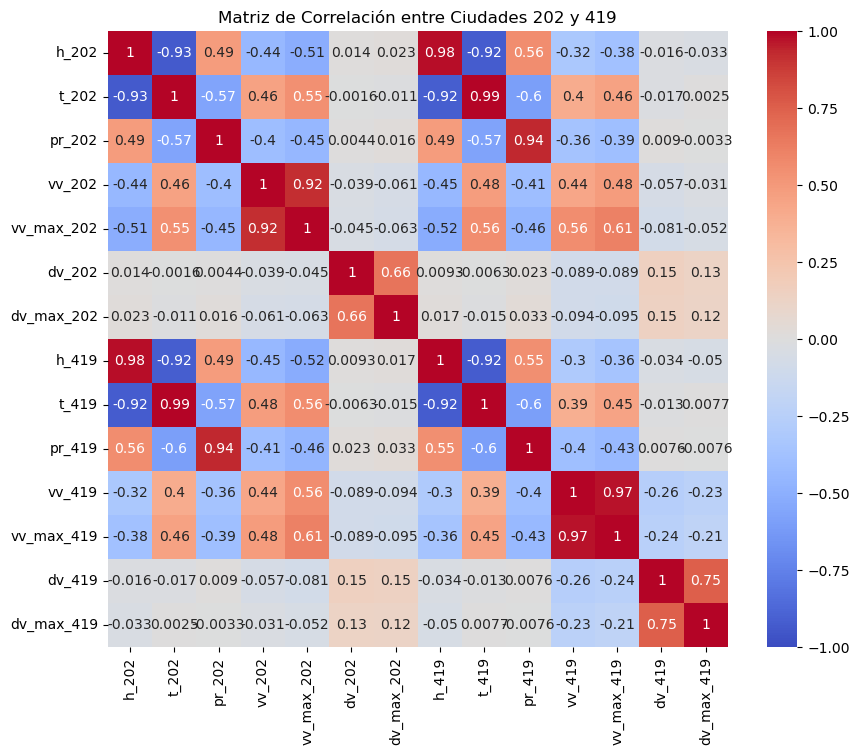

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Ciudades 202 y 419")
plt.show()
# Conlcuiones h, t y pr contienen una alta correlacion para  rellenar los datos del uno al otro, la velocidad del viento 419 tiene una alta correlacion con la velocidad maxima del viento, osea que son redundante
# se puede aplicar una aplicacion lineal 

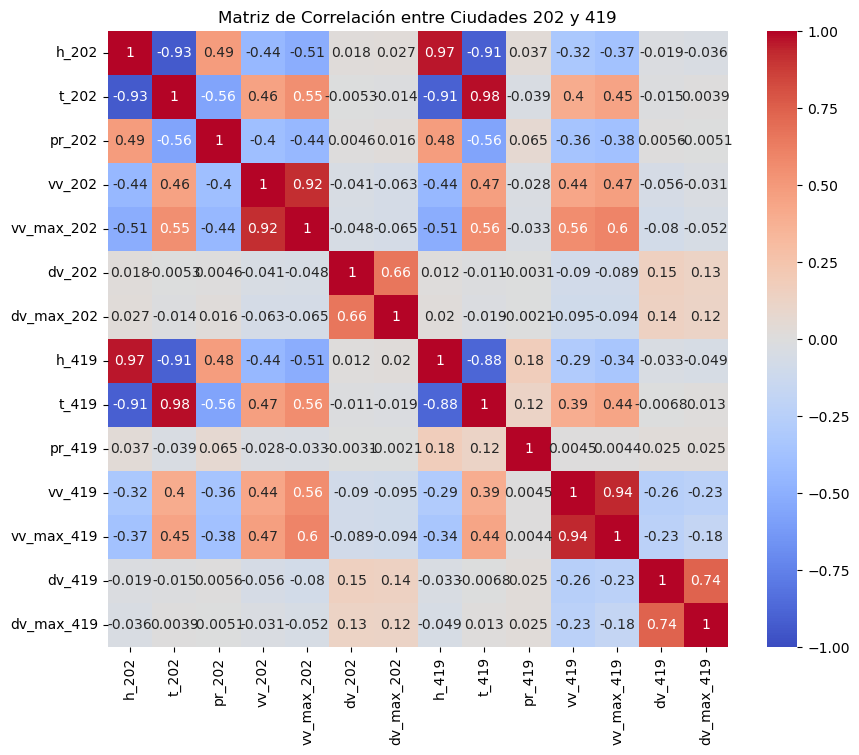

In [133]:
ciudad_202 = df[(df['codigo'] == 202)].set_index('fecha_hora').sort_index()
ciudad_419 = df[(df['codigo'] == 419)].set_index('fecha_hora').sort_index()

merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max']],
    lsuffix='_202', rsuffix='_419', how='inner'
)
merged_data = merged_data.dropna()
correlation_matrix = merged_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Ciudades 202 y 419")
plt.show()

In [1]:
# df = pd.concat([df_igual_1, df_final], ignore_index=True)
ciudad_202 = df_filas_con_problemas_calidad[(df_filas_con_problemas_calidad['codigo'] == 202)].set_index('fecha_hora').sort_index()
ciudad_419 = df_filas_con_problemas_calidad[(df_filas_con_problemas_calidad['codigo'] == 419)].set_index('fecha_hora').sort_index()
merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max','p']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max','p']],
    lsuffix='_202', rsuffix='_419', how='inner'
)
merged_data = merged_data.dropna()
correlation_matrix = merged_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Ciudades 202 y 419")
plt.show()

NameError: name 'df_filas_con_problemas_calidad' is not defined

In [132]:
df_filas_con_problemas_calidad['calidad'].value_counts()

calidad
1      13641697
2        375630
255        2196
Name: count, dtype: int64

In [134]:
df['calidad'].value_counts()

calidad
1          13641697
2            375630
154          218051
153           57571
156272        35259
155           25934
1511          17565
254           13901
1567          11160
151            5381
156            2340
255            2196
1514           1700
15345          1446
2511           1075
256272          557
1562            515
1534            476
2567            355
256             158
1546            143
2514            131
1546272          70
1545             67
1516272          57
1561             54
25345            36
1556272          32
1536             31
15462            27
15167            11
15672             8
2562              8
1516              5
15367             5
2546272           4
1515              4
15627             4
15146             4
1535              3
251               3
15467             2
2534              2
1571              2
15156             2
2556272           2
15162             1
15361             1
1572              1
1652        

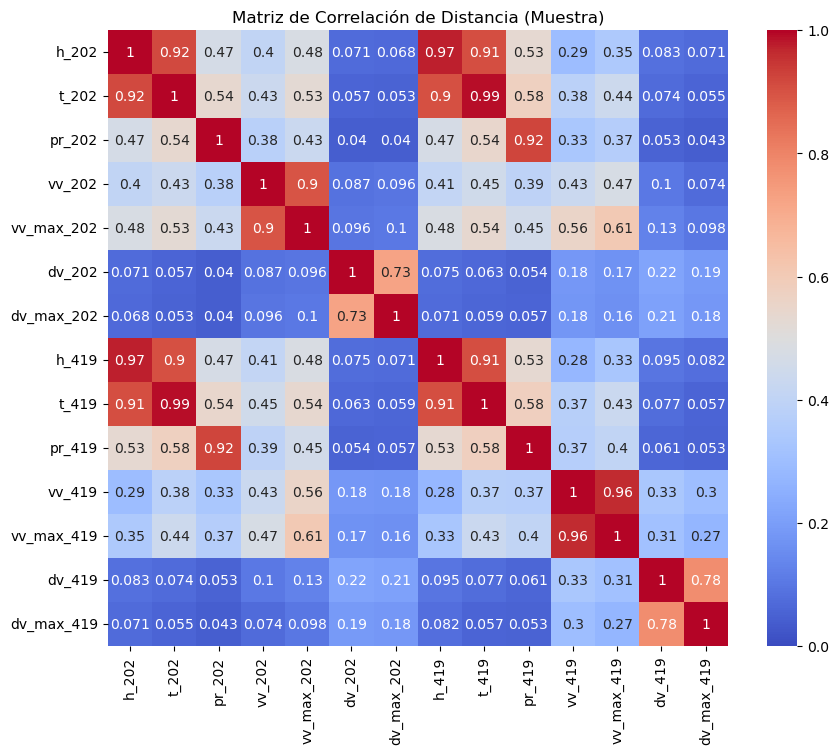

In [181]:
import dcor
import pandas as pd

sample_data = merged_data.sample(n=90000, random_state=42)

distance_corr_matrix = pd.DataFrame(index=sample_data.columns, columns=sample_data.columns)

for col1 in sample_data.columns:
    for col2 in sample_data.columns:
        distance_corr_matrix.loc[col1, col2] = dcor.distance_correlation(
            sample_data[col1].dropna(), sample_data[col2].dropna()
        )

distance_corr_matrix = distance_corr_matrix.astype(float)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(distance_corr_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Matriz de Correlación de Distancia (Muestra)")
plt.show()


In [182]:
spearman_corr = merged_data.corr(method='spearman')['vv_max_202']

In [183]:
spearman_corr

h_202        -0.492542
t_202         0.545514
pr_202       -0.400373
vv_202        0.899608
vv_max_202    1.000000
dv_202       -0.055402
dv_max_202   -0.071833
h_419        -0.494236
t_419         0.553463
pr_419       -0.440887
vv_419        0.585114
vv_max_419    0.644387
dv_419       -0.105960
dv_max_419   -0.081366
Name: vv_max_202, dtype: float64

In [184]:
kendall_corr = merged_data.corr(method='kendall')['vv_max_202']

In [185]:
kendall_corr

h_202        -0.342548
t_202         0.384477
pr_202       -0.275850
vv_202        0.748826
vv_max_202    1.000000
dv_202       -0.036049
dv_max_202   -0.046817
h_419        -0.344367
t_419         0.389979
pr_419       -0.303561
vv_419        0.415600
vv_max_419    0.466373
dv_419       -0.072394
dv_max_419   -0.055903
Name: vv_max_202, dtype: float64

In [191]:
sample_data = merged_data.sample(n=30000, random_state=42)

X_sample = sample_data.drop(columns=['vv_max_202']) 
y_sample = sample_data['vv_max_202']  

mi = mutual_info_regression(X_sample, y_sample)
mutual_info = pd.Series(mi, index=X_sample.columns)
print("Información Mutua Multivariante:\n", mutual_info)

Información Mutua Multivariante:
 h_202         0.159580
t_202         0.184966
pr_202        0.114320
vv_202        0.949589
dv_202        0.061752
dv_max_202    0.098776
h_419         0.163914
t_419         0.199490
pr_419        0.141279
vv_419        0.210943
vv_max_419    0.278282
dv_419        0.046613
dv_max_419    0.040126
dtype: float64


In [192]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns)
print("Importancia de las características:\n", importances)

Importancia de las características:
 h_202         0.009677
t_202         0.011161
pr_202        0.007492
vv_202        0.844183
dv_202        0.011732
dv_max_202    0.009990
h_419         0.011297
t_419         0.010016
pr_419        0.009184
vv_419        0.010452
vv_max_419    0.046780
dv_419        0.009845
dv_max_419    0.008191
dtype: float64


In [34]:
df['día'] = df['fecha_hora'].dt.day
df['mes'] = df['fecha_hora'].dt.month
df['año'] = df['fecha_hora'].dt.year
df['hora'] = df['fecha_hora'].dt.hour
df['minuto'] = df['fecha_hora'].dt.minute
ciudad_202 = df[(df['codigo'] == 202)].set_index('fecha_hora').sort_index()
ciudad_419 = df[(df['codigo'] == 419)].set_index('fecha_hora').sort_index()

merged_data = ciudad_202[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max','día','mes','hora','año','minuto']].join(
    ciudad_419[['h', 't', 'pr', 'vv', 'vv_max', 'dv', 'dv_max','día','mes','hora','año','minuto']],
    lsuffix='_202', rsuffix='_419', how='inner'
)
merged_data = merged_data.dropna()
correlation_matrix = merged_data.corr()

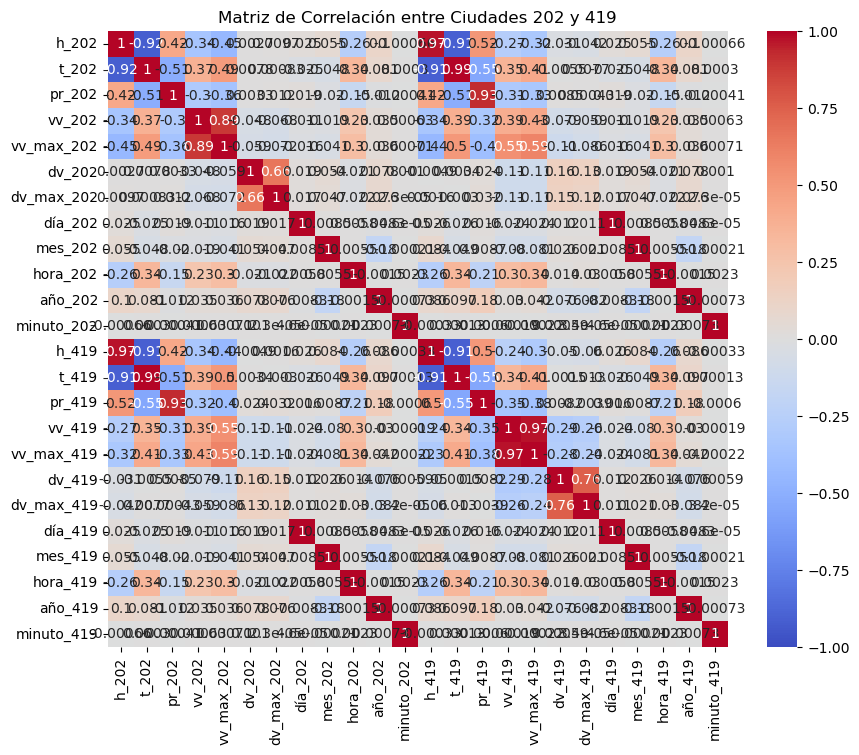

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = merged_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Ciudades 202 y 419")
plt.show()

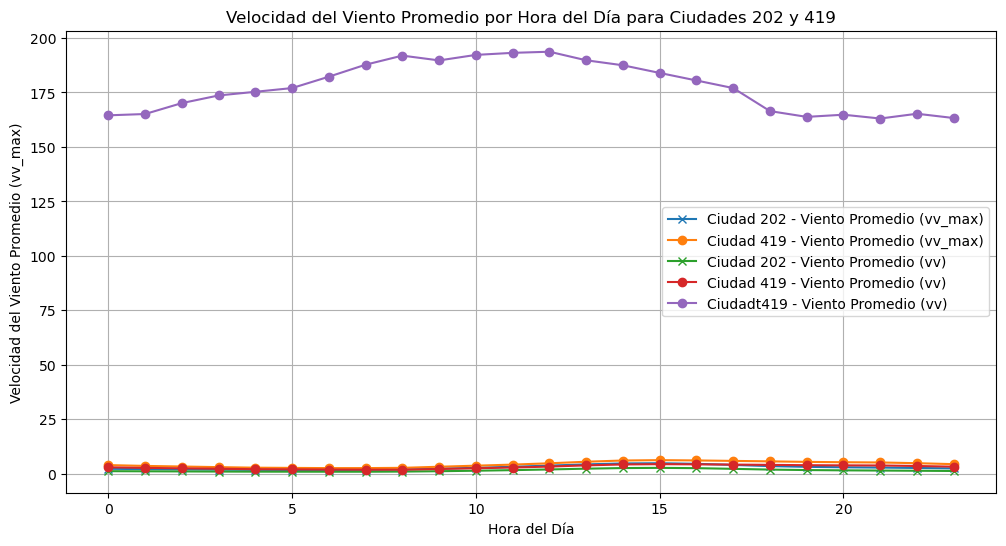

In [96]:


promedio_viento_por_hora_202 = merged_data.groupby('hora_202')['vv_max_202'].mean()
promedio_viento_por_hora_419 = merged_data.groupby('hora_419')['vv_max_419'].mean()
promedio_viento_n_por_hora_202 = merged_data.groupby('hora_202')['vv_202'].mean()
promedio_viento_n_por_hora_419 = merged_data.groupby('hora_419')['vv_419'].mean()

promedio_t = merged_data.groupby('hora_419')['dv_202'].mean()

plt.figure(figsize=(12, 6))
plt.plot(promedio_viento_por_hora_202, label='Ciudad 202 - Viento Promedio (vv_max)', marker='x')
plt.plot(promedio_viento_por_hora_419, label='Ciudad 419 - Viento Promedio (vv_max)', marker='o')
plt.plot(promedio_viento_n_por_hora_202, label='Ciudad 202 - Viento Promedio (vv)', marker='x')
plt.plot(promedio_viento_n_por_hora_419, label='Ciudad 419 - Viento Promedio (vv)', marker='o')
plt.plot(promedio_t, label='Ciudadt419 - Viento Promedio (vv)', marker='o')

plt.xlabel("Hora del Día")
plt.ylabel("Velocidad del Viento Promedio (vv_max)")
plt.title("Velocidad del Viento Promedio por Hora del Día para Ciudades 202 y 419")
plt.legend()
plt.grid(True)
plt.show()

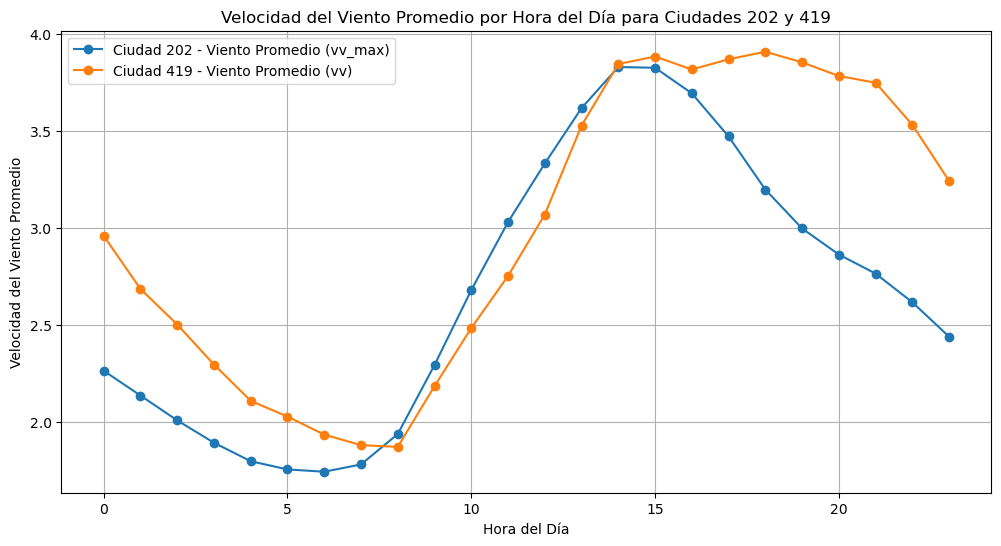

Correlación de Spearman por hora entre vv_max (Ciudad 202) y vv (Ciudad 419): 0.8530434782608695
Correlación de Kendall por hora entre vv_max (Ciudad 202) y vv (Ciudad 419): 0.6884057971014493
Información Mutua por hora entre vv_max (Ciudad 202) y vv (Ciudad 419): 0.5878794740498037


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau
from sklearn.feature_selection import mutual_info_regression

promedio_por_hora = merged_data.groupby('hora_202').agg({
    'vv_max_202': 'mean',
    'vv_419': 'mean'
})

plt.figure(figsize=(12, 6))
plt.plot(promedio_por_hora.index, promedio_por_hora['vv_max_202'], label='Ciudad 202 - Viento Promedio (vv_max)', marker='o')
plt.plot(promedio_por_hora.index, promedio_por_hora['vv_419'], label='Ciudad 419 - Viento Promedio (vv)', marker='o')
plt.xlabel("Hora del Día")
plt.ylabel("Velocidad del Viento Promedio")
plt.title("Velocidad del Viento Promedio por Hora del Día para Ciudades 202 y 419")
plt.legend()
plt.grid(True)
plt.show()

correlacion_spearman = spearmanr(promedio_por_hora['vv_max_202'], promedio_por_hora['vv_419']).correlation
correlacion_kendall = kendalltau(promedio_por_hora['vv_max_202'], promedio_por_hora['vv_419']).correlation

mi_viento = mutual_info_regression(promedio_por_hora[['vv_max_202']], promedio_por_hora['vv_419'])[0]

print("Correlación de Spearman por hora entre vv_max (Ciudad 202) y vv (Ciudad 419):", correlacion_spearman)
print("Correlación de Kendall por hora entre vv_max (Ciudad 202) y vv (Ciudad 419):", correlacion_kendall)
print("Información Mutua por hora entre vv_max (Ciudad 202) y vv (Ciudad 419):", mi_viento)


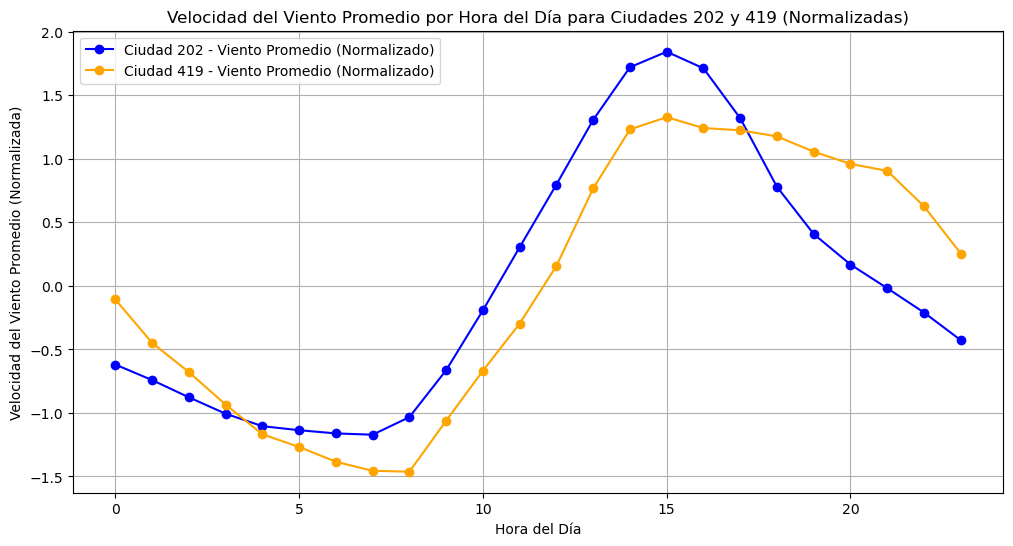

Correlación de Spearman por hora entre vv (Ciudad 202) y vv (Ciudad 419): 0.9226086956521738
Correlación de Kendall por hora entre vv (Ciudad 202) y vv (Ciudad 419): 0.8043478260869565
Información Mutua por hora entre vv (Ciudad 202) y vv (Ciudad 419): 0.6736583942037235


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr, kendalltau
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Calcular el promedio de velocidad de viento por hora para ambas ciudades
promedio_por_hora = merged_data.groupby('hora_202').agg({
    'vv_202': 'mean',
    'vv_419': 'mean'
})

# Normalizar ambas series entre 0 y 1
from sklearn.preprocessing import PowerTransformer

scaler = StandardScaler()
promedio_normalizado = pd.DataFrame(scaler.fit_transform(promedio_por_hora), columns=promedio_por_hora.columns, index=promedio_por_hora.index)

# Crear la gráfica normalizada
plt.figure(figsize=(12, 6))
plt.plot(promedio_normalizado.index, promedio_normalizado['vv_202'], color='blue', marker='o', label='Ciudad 202 - Viento Promedio (Normalizado)')
plt.plot(promedio_normalizado.index, promedio_normalizado['vv_419'], color='orange', marker='o', label='Ciudad 419 - Viento Promedio (Normalizado)')
plt.xlabel("Hora del Día")
plt.ylabel("Velocidad del Viento Promedio (Normalizada)")
plt.title("Velocidad del Viento Promedio por Hora del Día para Ciudades 202 y 419 (Normalizadas)")
plt.legend()
plt.grid(True)
plt.show()

# Calcular las correlaciones y la información mutua
correlacion_spearman = spearmanr(promedio_normalizado['vv_202'], promedio_normalizado['vv_419']).correlation
correlacion_kendall = kendalltau(promedio_normalizado['vv_202'], promedio_normalizado['vv_419']).correlation
mi_viento = mutual_info_regression(promedio_normalizado[['vv_202']], promedio_normalizado['vv_419'])[0]

# Imprimir las métricas
print("Correlación de Spearman por hora entre vv (Ciudad 202) y vv (Ciudad 419):", correlacion_spearman)
print("Correlación de Kendall por hora entre vv (Ciudad 202) y vv (Ciudad 419):", correlacion_kendall)
print("Información Mutua por hora entre vv (Ciudad 202) y vv (Ciudad 419):", mi_viento)


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = promedio_normalizado[['vv_202']]
y = promedio_normalizado['vv_419']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

y_pred_test = model_rf.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("Evaluación del modelo Random Forest en el conjunto de prueba:")
print("Error Absoluto Medio (MAE):", mae_test)
print("Error Cuadrático Medio (MSE):", mse_test)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse_test)
print("Coeficiente de Determinación (R²) en el conjunto de prueba:", r2_test)

# Opcional: también puedes evaluar el modelo en el conjunto de entrenamiento para comparar
y_pred_train = model_rf.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print("\nPrecisión del modelo Random Forest (R²) en el conjunto de entrenamiento:", r2_train)


Evaluación del modelo Random Forest en el conjunto de prueba:
Error Absoluto Medio (MAE): 0.6157055751040683
Error Cuadrático Medio (MSE): 0.5536590853892944
Raíz del Error Cuadrático Medio (RMSE): 0.7440827140777391
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.4582191990677449

Precisión del modelo Random Forest (R²) en el conjunto de entrenamiento: 0.9611418250297314


Conjunto Entrenamiento
Error Absoluto Medio (MAE): 0.014991342052658204
Error Cuadrático Medio (MSE): 0.00040169623780785
Raíz del Error Cuadrático Medio (RMSE): 0.020042361083661028
Precisión del modelo (R²): 0.9803374839691905

Conjunto Validación
Error Absoluto Medio (MAE): 0.01494910020182255
Error Cuadrático Medio (MSE): 0.0004010577548579665
Raíz del Error Cuadrático Medio (RMSE): 0.020026426412567133
Precisión del modelo (R²): 0.9803568462340613

Conjunto Prueba
Error Absoluto Medio (MAE): 0.014989524205268898
Error Cuadrático Medio (MSE): 0.0004023368775462043
Raíz del Error Cuadrático Medio (RMSE): 0.02005833685892737
Precisión del modelo (R²): 0.9803945726664997



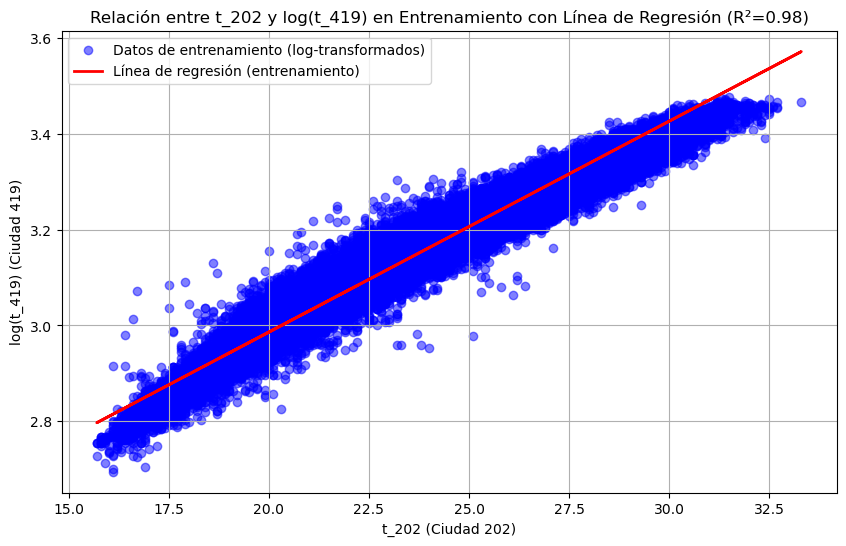

In [41]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = merged_data[['t_202']]
y = merged_data['t_419']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

X_train_log = X_train
y_train_log = np.log(y_train)

X_val_log = X_val
y_val_log = np.log(y_val)

X_test_log = X_test
y_test_log = np.log(y_test)

model_lr = LinearRegression()
model_lr.fit(X_train_log, y_train_log)

y_pred_train = model_lr.predict(X_train_log)
y_pred_val = model_lr.predict(X_val_log)
y_pred_test = model_lr.predict(X_test_log)

def evaluar_modelo(y_real, y_pred, conjunto):
    mae = mean_absolute_error(y_real, y_pred)
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_real, y_pred)
    
    print(f"Conjunto {conjunto}")
    print(f"Error Absoluto Medio (MAE): {mae}")
    print(f"Error Cuadrático Medio (MSE): {mse}")
    print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
    print(f"Precisión del modelo (R²): {r2}\n")

evaluar_modelo(y_train_log, y_pred_train, "Entrenamiento")
evaluar_modelo(y_val_log, y_pred_val, "Validación")
evaluar_modelo(y_test_log, y_pred_test, "Prueba")

plt.figure(figsize=(10, 6))
plt.scatter(X_test_log, y_test_log, color='blue', alpha=0.5, label='Datos de entrenamiento (log-transformados)')
plt.plot(X_test_log, y_pred_test, color='red', linewidth=2, label='Línea de regresión (entrenamiento)')
plt.xlabel("t_202 (Ciudad 202)")
plt.ylabel("log(t_419) (Ciudad 419)")
plt.title(f"Relación entre t_202 y log(t_419) en Entrenamiento con Línea de Regresión (R²={r2_score(y_test_log, y_pred_test):.2f})")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
 merged_data

In [72]:
rango_h_202 = merged_data[(merged_data['t_202'] >= 24) & (merged_data['t_202'] <= 30)]
correlacion_rango = rango_h_202[['t_419','h_419','h_202', 'dv_202', 'dv_419', 'vv_202', 'vv_419']].corr()['t_419']
correlacion_rango

t_419     1.000000
h_419    -0.736288
h_202    -0.762019
dv_202   -0.094272
dv_419   -0.099024
vv_202    0.317600
vv_419    0.144800
Name: t_419, dtype: float64

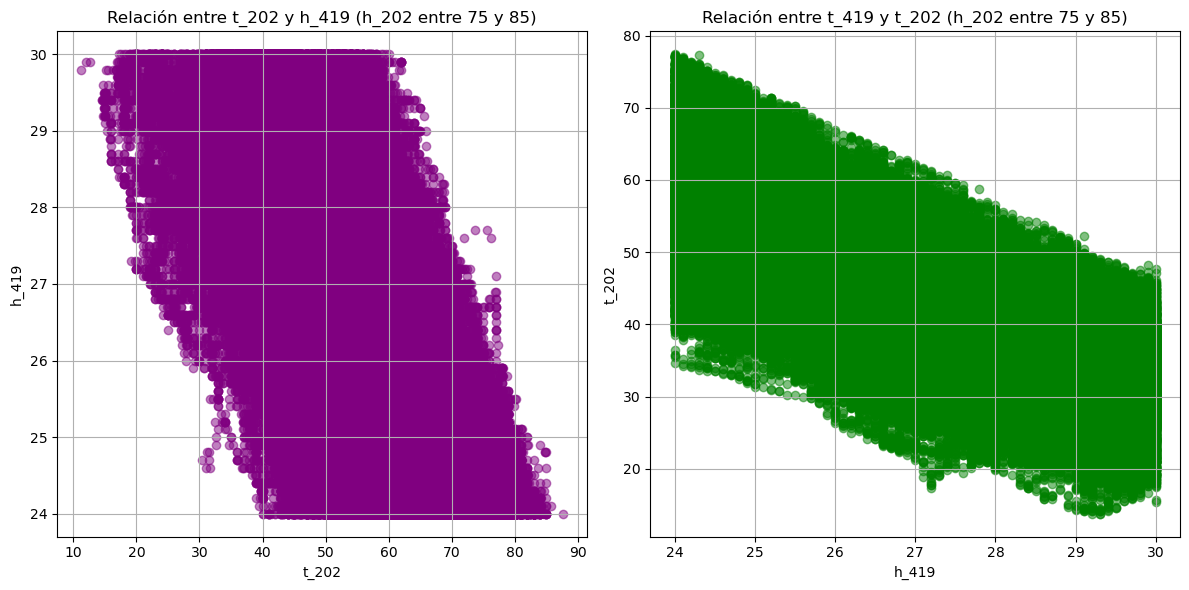

In [73]:
plt.figure(figsize=(12, 6))

# Gráfico de dispersión de h_419 vs t_202
plt.subplot(1, 2, 1)
plt.scatter( rango_h_202['h_419'],rango_h_202['t_202'], color='purple', alpha=0.5)
plt.xlabel("t_202")
plt.ylabel("h_419")
plt.title("Relación entre t_202 y h_419 (h_202 entre 75 y 85)")
plt.grid(True)

# Gráfico de dispersión de h_419 vs vv_202
plt.subplot(1, 2, 2)
plt.scatter( rango_h_202['t_202'],rango_h_202['h_202'], color='green', alpha=0.5)
plt.xlabel("h_419")
plt.ylabel("t_202")
plt.title("Relación entre t_419 y t_202 (h_202 entre 75 y 85)")
plt.grid(True)

plt.tight_layout()
plt.show()

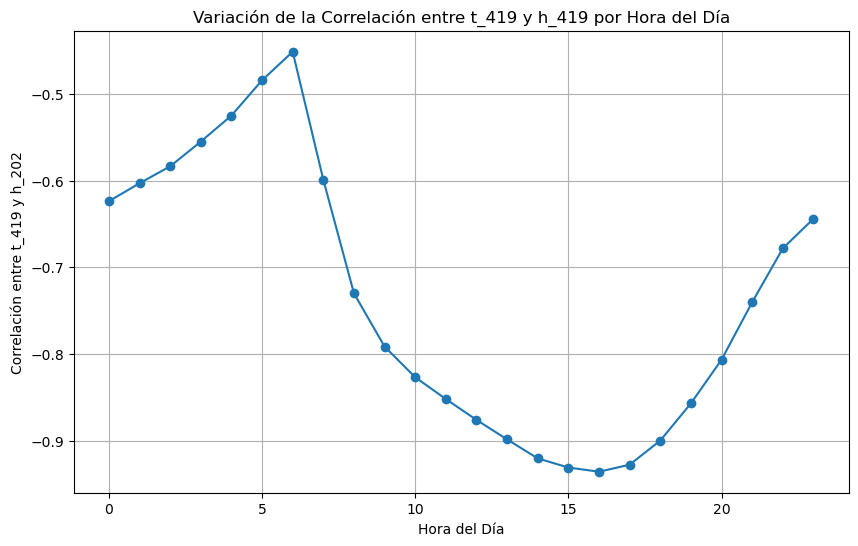

In [40]:
correlaciones_por_hora = merged_data.groupby('hora_202')[['t_419', 'h_202']].corr().unstack().iloc[:, 1]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(correlaciones_por_hora.index, correlaciones_por_hora.values, marker='o')
plt.xlabel("Hora del Día")
plt.ylabel("Correlación entre t_419 y h_202")
plt.title("Variación de la Correlación entre t_419 y h_419 por Hora del Día")
plt.grid(True)
plt.show()

In [72]:
intervalo_morning = merged_data[(merged_data['hora_202'] < 9)]
intervalo_daytime = merged_data[(merged_data['hora_202'] >= 0) & (merged_data['hora_202'] <= 24)]
intervalo_night = merged_data[(merged_data['hora_202'] > 20)]

# Calcular la correlación en cada intervalo
corr_morning = intervalo_morning[['t_202', 'h_202']].corr().iloc[0, 1]
corr_daytime = intervalo_daytime[['t_202', 'h_202']].corr().iloc[0, 1]
corr_night = intervalo_night[['t_202', 'h_202']].corr().iloc[0, 1]

print("Correlación entre t_202 y h_202 en la madrugada:", corr_morning)
print("Correlación entre t_202 y h_202 durante el día:", corr_daytime)
print("Correlación entre t_202 y h_202 en la noche:", corr_night)

Correlación entre t_202 y h_202 en la madrugada: -0.6452612129660368
Correlación entre t_202 y h_202 durante el día: -0.9301562187450815
Correlación entre t_202 y h_202 en la noche: -0.7040505559596972


In [85]:
from sklearn.linear_model import LinearRegression

X_daytime = intervalo_daytime[['t_202']]
y_daytime = intervalo_daytime['h_202']

model_daytime = LinearRegression()
model_daytime.fit(X_daytime, y_daytime)

r2_daytime = model_daytime.score(X_daytime, y_daytime)
print("Precisión del modelo de Regresión Lineal durante el día (R²):", r2_daytime)

Precisión del modelo de Regresión Lineal durante el día (R²): 0.8651905912700425


Error Absoluto Medio (MAE): 0.010434816444406077
Error Cuadrático Medio (MSE): 0.0002288514572740578
Raíz del Error Cuadrático Medio (RMSE): 0.015127837164448122
Precisión del modelo Random Forest (R²): 0.9877956945926899


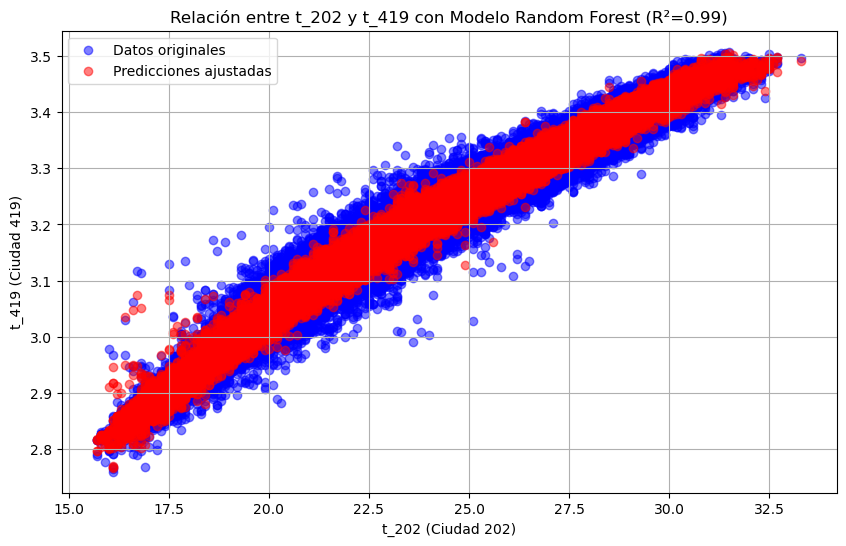

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

X = merged_data[['t_202', 'h_202', 'hora_202',"dv_202"]]
y = np.log1p(merged_data['t_419'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print(f"Error Absoluto Medio (MAE): {mae}")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
print("Precisión del modelo Random Forest (R²):", r2)

# Visualizar los resultados en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(X_test['t_202'], y_test, color='blue', alpha=0.5, label='Datos originales')
plt.scatter(X_test['t_202'], y_pred_rf, color='red', alpha=0.5, label='Predicciones ajustadas')
plt.xlabel("t_202 (Ciudad 202)")
plt.ylabel("t_419 (Ciudad 419)")
plt.title(f"Relación entre t_202 y t_419 con Modelo Random Forest (R²={r2:.2f})")
plt.legend()
plt.grid(True)
plt.show()


Precisión del modelo Random Forest (R²): 0.9900495281920227


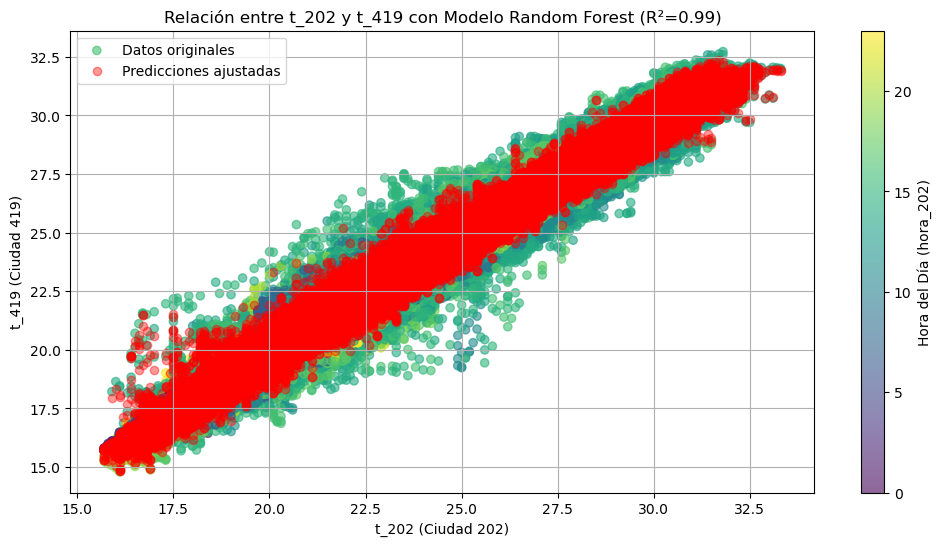

In [91]:
print("Precisión del modelo Random Forest (R²):", r2)

plt.figure(figsize=(12, 6))
scatter = plt.scatter(X['t_202'], y, c=X['hora_202'], cmap='viridis', alpha=0.6, label='Datos originales')
plt.colorbar(scatter, label='Hora del Día (hora_202)')
plt.scatter(X['t_202'], y_pred_rf, color='red', alpha=0.4, label='Predicciones ajustadas')
plt.xlabel("t_202 (Ciudad 202)")
plt.ylabel("t_419 (Ciudad 419)")
plt.title(f"Relación entre t_202 y t_419 con Modelo Random Forest (R²={r2:.2f})")
plt.legend()
plt.grid(True)
plt.show()

Precisión del modelo Random Forest (R²): 0.9900495281920227


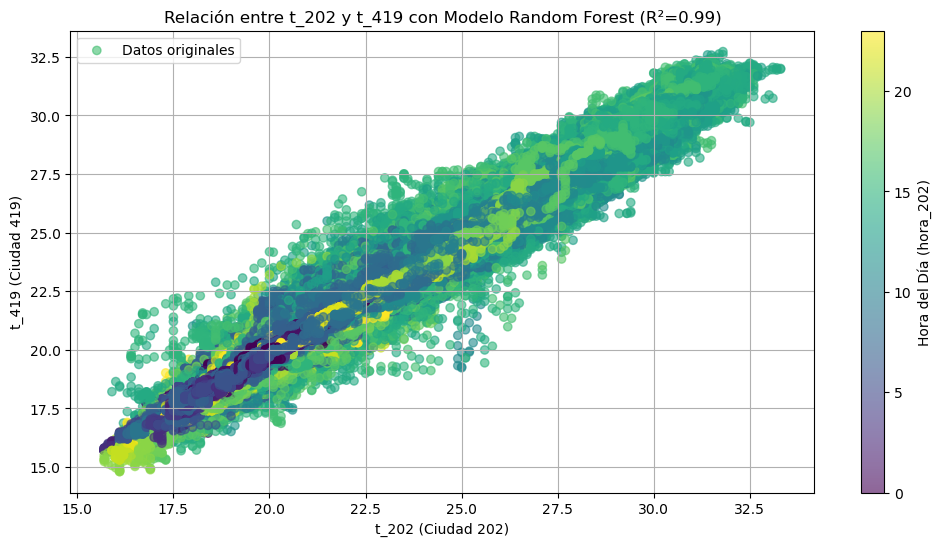

In [92]:
print("Precisión del modelo Random Forest (R²):", r2)

plt.figure(figsize=(12, 6))
scatter = plt.scatter(X['t_202'], y, c=X['hora_202'], cmap='viridis', alpha=0.6, label='Datos originales')
plt.colorbar(scatter, label='Hora del Día (hora_202)')
plt.xlabel("t_202 (Ciudad 202)")
plt.ylabel("t_419 (Ciudad 419)")
plt.title(f"Relación entre t_202 y t_419 con Modelo Random Forest (R²={r2:.2f})")
plt.legend()
plt.grid(True)
plt.show()

# Creacion de modelos